In [22]:
import matplotlib.pyplot as plt

def get_val_losses(path):
    losses = []
    with open(path) as f:
        for line in f.readlines():
            parts = line.split(',')
            if len(parts) == 6 and parts[0] == "('epoch'":
                losses.append(float(parts[5][:-2]))
    return losses

no_sigmoid_relu6 = get_val_losses('logs/paulg.lstm.additive-forget-no-signmoid-relu6.log')
no_multiplies = get_val_losses('logs/paulg.lstm.additive-forget.log')
normal_lstm = get_val_losses('logs/paulg.lstm.log')
x = list(range(500))
assert len(x) == len(normal_lstm) == len(no_multiplies) == len(no_sigmoid_relu6)

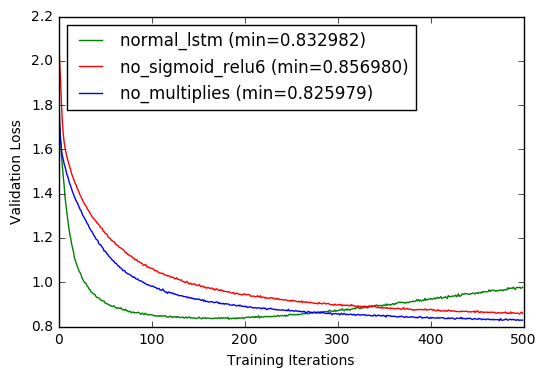

In [27]:
plt.clf()
# linestyle='--', marker='o', 
plt.plot(x, normal_lstm, color='g',label="normal_lstm (min=%f)" % min(normal_lstm))
plt.plot(x, no_sigmoid_relu6, color='r', label="no_sigmoid_relu6 (min=%f)" % min(no_sigmoid_relu6))
plt.plot(x, no_multiplies, color='b', label="no_multiplies (min=%f)"% min(no_multiplies))
plt.legend(loc=2)
plt.xlabel('Training Iterations')
plt.ylabel('Validation Loss')
plt.show()